In [30]:
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import mir_eval
import matplotlib.patches as patches


102
67
42
23
162
222
257
282
301


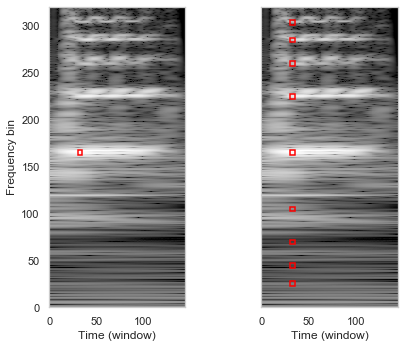

In [92]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(1,2, sharex=True, sharey=True)

# audio, sr = librosa.load("../../datasets/mdb-synth/MDB-mf0-synth/audio_mix/MusicDelta_Hendrix_MIX_mf0synth.wav", sr=None)
audio, sr = librosa.load("./cello_A3_1_mezzo-piano_arco-minor-trill.mp3", sr=None)

HOP_LENGTH = 256
FMIN = 32.7
BINS_PER_OCTAVE = 60
N_BINS = BINS_PER_OCTAVE*6
top_db = 80.0

def spectrogram_function(audio, samplerate):
    cqt = librosa.cqt(audio, sr=samplerate, hop_length=HOP_LENGTH, fmin=FMIN, n_bins=N_BINS, bins_per_octave=BINS_PER_OCTAVE, filter_scale=1)

    log_cqt = librosa.core.amplitude_to_db(np.abs(cqt), ref=np.max, top_db=top_db)
    return log_cqt

spectrogram = spectrogram_function(audio, sr)


# librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear')
# cmap = sns.cubehelix_palette(light=0.98, reverse=False, as_cmap=True)
cmap = "gray"
plt.sca(axs[0])
plt.xlabel("Time (window)")
plt.ylabel("Frequency bin")
plt.imshow(spectrogram, cmap=cmap, aspect="equal", origin="lower")

undertones = 4
overtones = 5
offset = 162
#offset = 162+60+35
for mult in [1/(x+2) for x in range(undertones)]+list(range(1, overtones+1)):
    f_ref = 440  # arbitrary reference frequency
    hz = f_ref*mult
    interval = librosa.core.hz_to_midi(hz) - librosa.core.hz_to_midi(f_ref)

    int_bins = int(round((interval)*BINS_PER_OCTAVE/12))+offset

    print(int_bins)
    rect = patches.Rectangle((30,int_bins),5,5,linewidth=1.5,edgecolor='red',facecolor='none')
    axs[1].add_patch(rect)

plt.ylim(0, 320)

plt.sca(axs[1])
plt.xlabel("Time (window)")

rect = patches.Rectangle((30,offset),5,5,linewidth=1.5,edgecolor='red',facecolor='none')
axs[0].add_patch(rect)


plt.imshow(spectrogram, cmap=cmap, aspect="equal", origin="lower")

#axs[0].set_title("Vstupní audio soubor")
#axs[1].set_title("Výstupní kontury výšky melodie")


plt.tight_layout()
#sns.lineplot(t, f)
fig.savefig("vibrato.pdf", bbox_inches="tight")

In [39]:
spectrogram.shape

(540, 73)